# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: Mingyun Zhang

I have used the following AI tools: CHATGPT

I understand that my submission needs to be my own work: MYZ

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

In Visual Studio Code: Use Export (click on ... in the menu bar) to save your notebook as a HTML file.

In Colab you need to save the notebook on GoogleDrive and then add the following block

In [ ]:
# !pip install nbconvert
#
# from google.colab import drive
# drive.mount('/content/drive')
# !jupyter nbconvert --to html /content/drive/MyDrive/Colab\ Notebooks/Copy\ of\ robot_vacuum.ipynb

You will need to fix the file location on your GoogleDrive.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [ ]:
# make sure numpy is installed
!pip install -q numpy

In [ ]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [ ]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'west'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a different performance measure than the one specified in the PEAS description! Since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room. Your implementation needs to implement the **correct performance measure.** The energy budget of the agent is specified as `max_steps`.

In [ ]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned



Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [ ]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: suck
step 1 - action: north
step 2 - action: south
step 3 - action: south
step 4 - action: south
step 5 - action: south
step 6 - action: east
step 7 - action: west
step 8 - action: suck
step 9 - action: north
step 10 - action: suck
step 11 - action: south
step 12 - action: east
step 13 - action: north
step 14 - action: west
step 15 - action: east
step 16 - action: east
step 17 - action: suck
step 18 - action: east
step 19 - action: south


4

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable. For example, long lines may get cut off. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [ ]:
import numpy as np

def initialize_room(n=5, p=0.2):
    """ Initialize the room with random dirt. """
    return np.random.rand(n, n) < p  # True is dirty, False is clean

def simulate_environment(agent, n=5, p=0.2, max_steps=1000, verbose=False ):
    # Initialize the room and agent's position
    room = initialize_room(n, p)
    agent_position = np.random.randint(0, n, size=2)
    actions_count = 0

    def is_clean():
        """ Check if all squares are clean. """
        return not np.any(room)

    while actions_count < max_steps and not is_clean():
        current_pos = tuple(agent_position)
        # Sensors: check for dirt and wall bumpers
        dirty = room[current_pos]
        bumpers = {
            "north": agent_position[0] == 0,
            "east": agent_position[1] == n-1,
            "south": agent_position[0] == n-1,
            "west": agent_position[1] == 0
        }

        # Agent chooses action
        action = agent(bumpers, dirty)

        # Environment reacts
        if action == "suck" and dirty:
            room[current_pos] = False  # Clean the dirt
        elif action in ["north", "east", "south", "west"]:
            move_dict = {"north": (-1, 0), "east": (0, 1), "south": (1, 0), "west": (0, -1)}
            if not bumpers[action]:  # Move if no wall
                agent_position += np.array(move_dict[action])
        elif action == "no_op":
            break
        actions_count += 1
        if verbose:
            print(f"Step {actions_count} - Position {agent_position} - Action: {action}")

    return actions_count


## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function. Use the function signature for the `simple_randomized_agent` function above.

In [ ]:
# Define a simple reflex agent
def simple_reflex_agent(bumpers, dirty):
    if dirty:
        return "suck"
    else:
        # Basic reflex: go in a random direction away from walls
        return np.random.choice([action for action in ["north", "east", "south", "west"] if not bumpers[action]])

# Example usage of the simple reflex agent function
steps_used = simulate_environment(simple_reflex_agent, max_steps=100, verbose=True)
print(f"Total steps used by the agent: {steps_used}")


Step 1 - Position [1 2] - Action: north
Step 2 - Position [1 3] - Action: east
Step 3 - Position [1 4] - Action: east
Step 4 - Position [1 3] - Action: west
Step 5 - Position [0 3] - Action: north
Step 6 - Position [0 4] - Action: east
Step 7 - Position [1 4] - Action: south
Step 8 - Position [2 4] - Action: south
Step 9 - Position [2 3] - Action: west
Step 10 - Position [1 3] - Action: north
Step 11 - Position [0 3] - Action: north
Step 12 - Position [0 2] - Action: west
Step 13 - Position [0 1] - Action: west
Step 14 - Position [0 0] - Action: west
Step 15 - Position [1 0] - Action: south
Step 16 - Position [2 0] - Action: south
Step 17 - Position [2 1] - Action: east
Step 18 - Position [2 0] - Action: west
Step 19 - Position [3 0] - Action: south
Step 20 - Position [2 0] - Action: north
Step 21 - Position [3 0] - Action: south
Step 22 - Position [2 0] - Action: north
Step 23 - Position [3 0] - Action: south
Step 24 - Position [4 0] - Action: south
Step 25 - Position [3 0] - Action: 

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

In [ ]:
# Your short description of the state and your implementation goes here
# Current Position: The agent's current location on the grid (stored as a tuple [row, col]).
# Visited Squares: A set of squares that the agent has already visited, ensuring it doesn't revisit unnecessary locations.
# Cleaned Squares: A set of squares that have already been cleaned, helping the agent avoid redundant cleaning actions.
# Path Stack: A stack that tracks the agent's movement path, allowing it to backtrack and explore unvisited squares if necessary.

model_based_reflex_agent navigates and cleans a grid-based room using internal state tracking and movement policies.

1. Current Position:
The agent's current position in the grid is stored in `self.current_position`. It is initialized to (0, 0), which represents the top-left corner of the grid.

2. Visited Squares:
The self.visited collection contains all grid squares that the agent has visited. On initialization, the initial position (0, 0) is added to this collection.

3. Cleaned Squares:
self.cleaned_squares is a collection that keeps track of all squares that the agent has cleaned.

4. Path Stack:
self.path_stack is used to remember the path taken by the agent so that it can backtrack efficiently. The agent's current position is pushed onto this stack before moving to a new position.

This setup provides a structured way to systematically explore all areas of the room, clean as needed, and efficiently backtrack to cover any missed areas.

In [ ]:
class model_based_reflex_agent:
    def __init__(self, room_size):
        self.room_size = room_size
        self.current_position = (0, 0)  # Start from the top-left corner
        self.visited = set([self.current_position])
        self.cleaned_squares = set()
        self.path_stack = [self.current_position]

    def search(self, bumpers, dirty):
        # Clean the current square if it's dirty and hasn't been cleaned yet
        if dirty and self.current_position not in self.cleaned_squares:
            self.cleaned_squares.add(self.current_position)
            return "suck"

        actions = ["north", "south", "west", "east"]
        move_dict = {"north": (-1, 0), "south": (1, 0), "west": (0, -1), "east": (0, 1)}

        # Try to move to an adjacent unvisited square
        for action in actions:
            dx, dy = move_dict[action]
            new_position = (self.current_position[0] + dx, self.current_position[1] + dy)
            if (0 <= new_position[0] < self.room_size and
                0 <= new_position[1] < self.room_size and
                new_position not in self.visited and
                not bumpers.get(action, False)):
                self.visited.add(new_position)
                self.path_stack.append(self.current_position)  # Push current position to the stack
                self.current_position = new_position
                return action

        # Backtrack if no unvisited adjacent squares
        if self.path_stack:
            previous_position = self.path_stack.pop()
            dx = previous_position[0] - self.current_position[0]
            dy = previous_position[1] - self.current_position[1]
            self.current_position = previous_position
            # Determine the action to move back
            if dx == -1:
                return "north"
            elif dx == 1:
                return "south"
            elif dy == -1:
                return "west"
            elif dy == 1:
                return "east"

        return "no_op"  # No more moves; cleaning is complete


In [ ]:
room_size = 5
agent = model_based_reflex_agent(room_size)
steps_used = simulate_environment(agent.search, room_size ,max_steps=200,verbose=True)
print(f"Total steps used by the agent: {steps_used}")

Step 1 - Position [4 2] - Action: suck
Step 2 - Position [4 3] - Action: east
Step 3 - Position [4 4] - Action: east
Step 4 - Position [4 3] - Action: west
Step 5 - Position [4 2] - Action: west
Total steps used by the agent: 5


## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [ ]:
import pandas as pd

grid_size = 5
dirt_probability = 0.2
max_steps_list = [500]
runs = 100


# Data structure to store results
result_5 = {'Randomized Agent': {ms: [] for ms in max_steps_list},
           'Simple Reflex Agent': {ms: [] for ms in max_steps_list},
           'Model-based Reflex Agent': {ms: [] for ms in max_steps_list}}

for max_steps in max_steps_list:
    for _ in range(runs):
        # Randomized Agent
        steps = simulate_environment(simple_randomized_agent, n=grid_size, p=dirt_probability, max_steps=max_steps)
        result_5['Randomized Agent'][max_steps].append(steps)

        # Simple Reflex Agent
        steps = simulate_environment(simple_reflex_agent, n=grid_size, p=dirt_probability, max_steps=max_steps)
        result_5['Simple Reflex Agent'][max_steps].append(steps)

        # Model-based Reflex Agent
        agent = model_based_reflex_agent(grid_size)
        steps = simulate_environment(agent.search, n=grid_size, p=dirt_probability, max_steps=max_steps)
        result_5['Model-based Reflex Agent'][max_steps].append(steps)


# Run simulations for 5x5 grids using different agents
for agent_type, data in result_5.items():
    for max_step, steps in data.items():
        average_steps = sum(steps) / len(steps)
        print(f"{agent_type}, Max Steps: {max_step}, Average Steps: {average_steps:.2f}")


Randomized Agent, Max Steps: 500, Average Steps: 386.44
Simple Reflex Agent, Max Steps: 500, Average Steps: 98.48
Model-based Reflex Agent, Max Steps: 500, Average Steps: 15.80


In [ ]:
import pandas as pd

grid_size = 10
dirt_probability = 0.2
max_steps_list = [5000]
runs = 100


# Data structure to store results
result_10 = {'Randomized Agent': {ms: [] for ms in max_steps_list},
           'Simple Reflex Agent': {ms: [] for ms in max_steps_list},
           'Model-based Reflex Agent': {ms: [] for ms in max_steps_list}}

for max_steps in max_steps_list:
    for _ in range(runs):
        # Randomized Agent
        steps = simulate_environment(simple_randomized_agent, n=grid_size, p=dirt_probability, max_steps=max_steps)
        result_10['Randomized Agent'][max_steps].append(steps)

        # Simple Reflex Agent
        steps = simulate_environment(simple_reflex_agent, n=grid_size, p=dirt_probability, max_steps=max_steps)
        result_10['Simple Reflex Agent'][max_steps].append(steps)

        # Model-based Reflex Agent
        agent = model_based_reflex_agent(grid_size)
        steps = simulate_environment(agent.search, n=grid_size, p=dirt_probability, max_steps=max_steps)
        result_10['Model-based Reflex Agent'][max_steps].append(steps)


# Run simulations for 5x5 grids using different agents
for agent_type, data in result_10.items():
    for max_step, steps in data.items():
        average_steps = sum(steps) / len(steps)
        print(f"{agent_type}, Max Steps: {max_step}, Average Steps: {average_steps:.2f}")


Randomized Agent, Max Steps: 5000, Average Steps: 2849.03
Simple Reflex Agent, Max Steps: 5000, Average Steps: 891.60
Model-based Reflex Agent, Max Steps: 5000, Average Steps: 57.91


In [ ]:
import pandas as pd

grid_size = 100
dirt_probability = 0.2
max_steps_list = [50000]
runs = 100


# Data structure to store results
result_100 = {'Randomized Agent': {ms: [] for ms in max_steps_list},
           'Simple Reflex Agent': {ms: [] for ms in max_steps_list},
           'Model-based Reflex Agent': {ms: [] for ms in max_steps_list}}

for max_steps in max_steps_list:
    for _ in range(runs):
        # Randomized Agent
        steps = simulate_environment(simple_randomized_agent, n=grid_size, p=dirt_probability, max_steps=max_steps)
        result_100['Randomized Agent'][max_steps].append(steps)

        # Simple Reflex Agent
        steps = simulate_environment(simple_reflex_agent, n=grid_size, p=dirt_probability, max_steps=max_steps)
        result_100['Simple Reflex Agent'][max_steps].append(steps)

        # Model-based Reflex Agent
        agent = model_based_reflex_agent(grid_size)
        steps = simulate_environment(agent.search, n=grid_size, p=dirt_probability, max_steps=max_steps)
        result_100['Model-based Reflex Agent'][max_steps].append(steps)


# Run simulations for 5x5 grids using different agents
for agent_type, data in result_100.items():
    for max_step, steps in data.items():
        average_steps = sum(steps) / len(steps)
        print(f"{agent_type}, Max Steps: {max_step}, Average Steps: {average_steps:.2f}")


Randomized Agent, Max Steps: 50000, Average Steps: 50000.00
Simple Reflex Agent, Max Steps: 50000, Average Steps: 50000.00
Model-based Reflex Agent, Max Steps: 50000, Average Steps: 5775.37


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | 386.44 |  98.48   | 15.80|
| 10x10   |  2849.03 | 891.60  | 57.91 |
| 100x100 | 50000.00| 50000.00| 5775.37 |

Add charts to compare the performance of the different agents.

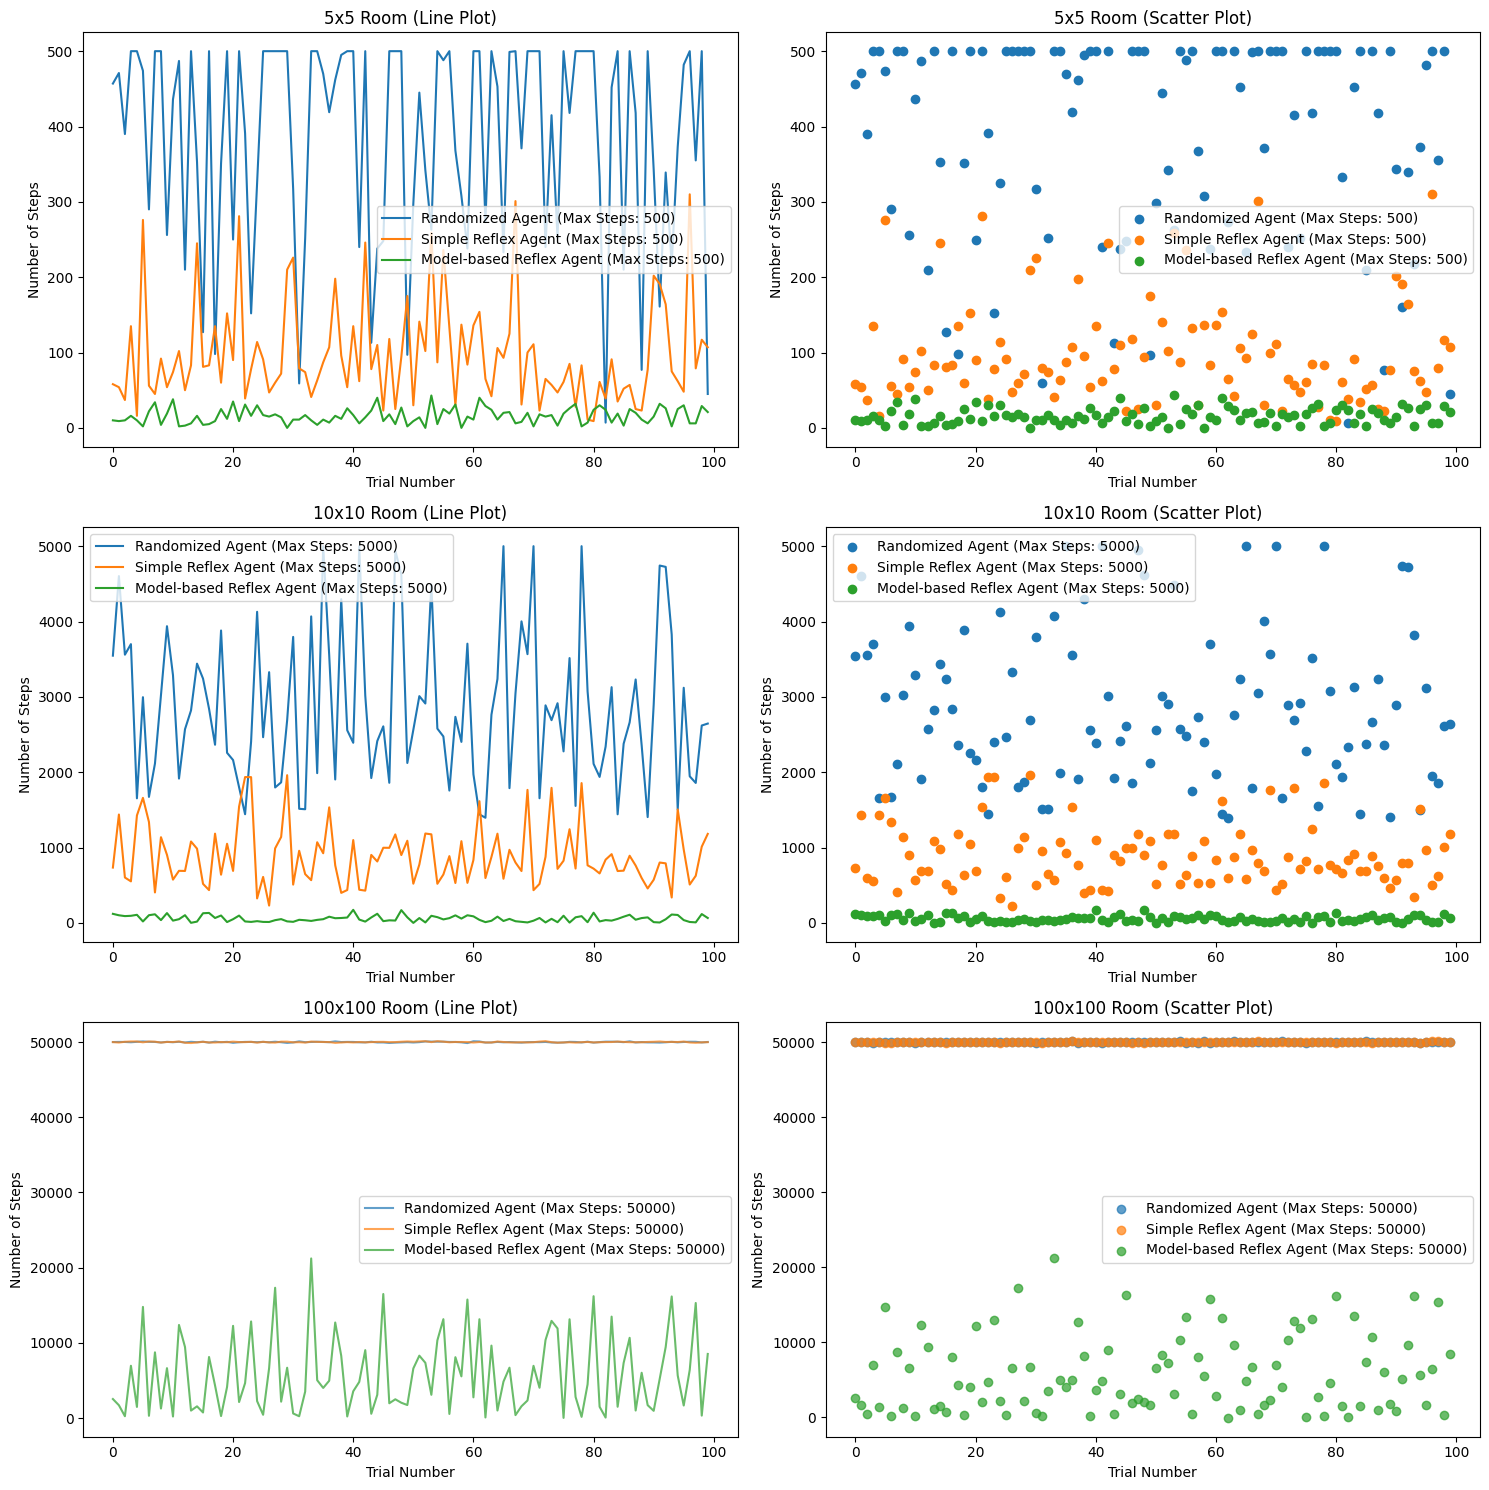

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Plot for result_5 (5x5 room) - Line plot
for agent_type, data in result_5.items():
    for max_step, steps in data.items():
        axs[0, 0].plot(steps, label=f"{agent_type} (Max Steps: {max_step})")
axs[0, 0].set_title("5x5 Room (Line Plot)")
axs[0, 0].set_xlabel("Trial Number")
axs[0, 0].set_ylabel("Number of Steps")
axs[0, 0].legend()

# Scatter plot for result_5 (5x5 room)
for agent_type, data in result_5.items():
    for max_step, steps in data.items():
        axs[0, 1].scatter(range(len(steps)), steps, label=f"{agent_type} (Max Steps: {max_step})")
axs[0, 1].set_title("5x5 Room (Scatter Plot)")
axs[0, 1].set_xlabel("Trial Number")
axs[0, 1].set_ylabel("Number of Steps")
axs[0, 1].legend()

# Plot for result_10 (10x10 room) - Line plot
for agent_type, data in result_10.items():
    for max_step, steps in data.items():
        axs[1, 0].plot(steps, label=f"{agent_type} (Max Steps: {max_step})")
axs[1, 0].set_title("10x10 Room (Line Plot)")
axs[1, 0].set_xlabel("Trial Number")
axs[1, 0].set_ylabel("Number of Steps")
axs[1, 0].legend()

# Scatter plot for result_10 (10x10 room)
for agent_type, data in result_10.items():
    for max_step, steps in data.items():
        axs[1, 1].scatter(range(len(steps)), steps, label=f"{agent_type} (Max Steps: {max_step})")
axs[1, 1].set_title("10x10 Room (Scatter Plot)")
axs[1, 1].set_xlabel("Trial Number")
axs[1, 1].set_ylabel("Number of Steps")
axs[1, 1].legend()

# Plot for result_100 (100x100 room) - Line plot
for agent_type, data in result_100.items():
    for max_step, steps in data.items():
        jitter = np.random.normal(0, 50, size=len(steps))
        axs[2, 0].plot(range(len(steps)), np.array(steps) + jitter, label=f"{agent_type} (Max Steps: {max_step})", alpha=0.7)
axs[2, 0].set_title("100x100 Room (Line Plot)")
axs[2, 0].set_xlabel("Trial Number")
axs[2, 0].set_ylabel("Number of Steps")
axs[2, 0].legend()

# Scatter plot for result_100 (100x100 room)
for agent_type, data in result_100.items():
    for max_step, steps in data.items():
        jitter = np.random.normal(0, 50, size=len(steps))
        axs[2, 1].scatter(range(len(steps)), np.array(steps) + jitter, label=f"{agent_type} (Max Steps: {max_step})", alpha=0.7)
axs[2, 1].set_title("100x100 Room (Scatter Plot)")
axs[2, 1].set_xlabel("Trial Number")
axs[2, 1].set_ylabel("Number of Steps")
axs[2, 1].legend()


plt.tight_layout()


plt.show()


1.The performance of different agents in the room cleaning task is summarized. The performance of random agents, simple reflex agents, and model-based reflex agents in different room sizes (5x5, 10x10, 100x100) is shown in the chart, and their average number of steps in 100 experiments is compared.

2.Random agent: Randomly selects the direction of movement, the performance is unstable, and the number of steps increases sharply with the increase of room size. For large rooms (100x100), the maximum number of steps is 15000.

3.Simple reflex agent: It is much more efficient than the random agent, but there are still some unnecessary repeated movements, especially in medium and large rooms, the number of steps is significantly higher than the model-based agent.

4.Model-based reflex agent: It significantly optimizes the cleaning efficiency. It avoids repeated cleaning through the path backtracking mechanism, especially in large rooms (100x100), greatly reducing the number of steps, and the average number of steps is about 4000 steps less than the random agent, showing efficient performance.

5.Overall, the model-based reflex agent performs best across all room sizes, completing the cleaning in fewer steps, especially in large rooms, where it has a clear advantage.

## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).
* if the dirt sensor is not perfect and gives 10% of the time a wrong reading (clean when it is dirty or dirty when it is clean).
* if the bumper sensor is not perfect and 10% of the time does not report a wall when there is one.

* **if it is put into a rectangular room with unknown size**

  1.1 Simple Reflex Agent: This reflex agent relies on local perception (such as detecting dirt and collisions) and the size of the neighborhood for performance, and works well in rooms of any size. It continues cleaning until all dirt is removed or the maximum number of moves is reached.

  1.2 Simple Random Agent: A Random Agent moves by completely random selection of actions. It does not rely on perception or memory of the room, but simply performs random exploration.

  1.3 Model-Based Reflex Agent: This model requires prior knowledge of the room size to initialize its internal model, and the agent may not function properly if placed in a room of unknown dimensions.

* **if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or**

  2.1 Simple Reflex Agent:The agent's random movement and reliance on bumpers allows it to navigate irregular spaces to a certain extent.
  It may eventually clear all accessible areas, but without a strategy, this may take a long time.

  2.2 Simple Random Agent: Moves completely randomly, which may not be effective in irregular spaces.Does not adjust its actions based on the environment or past behavior.

  2.3 Model-based Reflection Agent: The agent's internal model is based on an assumed square grid room_size, which may not accurately represent irregularly shaped environments.It may try to access inaccessible blocks or fail to recognize all accessible areas.

* **if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).**

  3.1  Simple Reflection Agent: It treats obstacles the same way as walls due to the presence of bumper sensors.Avoid obstacles by not entering squares that the bumper indicates are blocked.

  3.2 Simple Random Agent: Actions are chosen randomly, including actions that may be blocked by obstacles.Bumper feedback prevents hitting obstacles, but the agent does not remember or avoid them in the future.

  3.3 Model-based Reflective Agent: If it believes an obstacle square has not been visited, it may initially try to enter that square. Once it hits an obstacle (detected by the bumper), it can update its internal model to mark the square as inaccessible.

* **if the dirt sensor is not perfect and gives 10% of the time a wrong reading (clean when it is dirty or dirty when it is clean).**

  4.1 Simple Reflex Agent: Sometimes the agent will think a clean square is dirty and try to clean it, or think a dirty square is clean and move on without cleaning it. Lacks the ability to verify or re-examine squares based on past perceptions.

  4.2 Simple random agent: Does not rely on a dirt sensor; randomly chooses to "suck" or move. Sensor errors have little effect on its behavior.

  4.3 Model-based Reflective Agent: When a dirty square is mistakenly considered clean, the agent may mark it as clean in its internal model and not return to it. Instead, it may try to clean a clean square, but because it remembers the location it visited, it is less likely to revisit that location unnecessarily.

* **if the bumper sensor is not perfect and 10% of the time does not report a wall when there is one.**

  5.1 Simple Reflective Agent: Sometimes the agent fails to detect a wall and tries to crash into it. Since the environment may prevent movement through walls, the agent will remain in the same position when this happens.

  5.2 Simple Random Agent: Chooses actions randomly, does not rely on bumper sensors.May frequently try to crash into walls or obstacles.

  5.3Model-based Reflection Agent: May incorrectly update its internal model based on incorrect bumper readings. If it detects no walls, it will assume the block is enterable and try to enter it, but will be unable to do so.




## Advanced task: Imperfect Dirt Sensor

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Change your simulation environment to run experiments for the following problem: The dirt sensor has a 10% chance of giving the wrong reading. Perform experiments to observe how this changes the performance of the three implementations. Your model-based reflex agent is likely not able to clean the whole room, so you need to measure performance differently as a tradeoff between energy cost and number of uncleaned squares.

2. Design an implement a solution for your model-based agent that will clean better. Show the improvement with experiments.

In [ ]:
import random

def initialise_room(n, p):
    """Initialize the room with dirty squares.
    n: size of the room (n x n)
    p: probability that a square is dirty
    Returns a numpy array of shape (n, n) with boolean values.
    """
    return np.random.rand(n, n) < p

def sensor_environment(agent, n=5, p=0.2, max_steps=10000, verbose=False):
    # Initialize the room and agent's position
    room = initialise_room(n, p)
    agent_position = (np.random.randint(0, n), np.random.randint(0, n))
    action_count = 0

    def is_clean():
        """Check if all squares are clean."""
        return not np.any(room)

    # Initialize the agent if necessary
    if hasattr(agent, 'initialize'):
        agent.initialize(n, agent_position)

    while action_count < max_steps and not is_clean():
        current_pos = agent_position
        # Sensors: Check for dirt and bumpers
        actual_dirty = room[current_pos]
        # Simulate sensor error (10% chance of incorrect reading)
        if np.random.rand() < 0.1:
            dirty = not actual_dirty
        else:
            dirty = actual_dirty
        bumpers = {
            "north": agent_position[0] == 0,
            "east": agent_position[1] == n - 1,
            "south": agent_position[0] == n - 1,
            "west": agent_position[1] == 0
        }
        # Agent chooses an action
        action = agent(bumpers, dirty)
        # Environment reacts
        if action == "suck":
            room[current_pos] = False  # Clean the dirt
        elif action in ["north", "east", "south", "west"]:
            move_dict = {"north": (-1, 0), "east": (0, 1), "south": (1, 0), "west": (0, -1)}
            if not bumpers[action]:
                # Move the agent
                dx, dy = move_dict[action]
                agent_position = (agent_position[0] + dx, agent_position[1] + dy)
                if hasattr(agent, 'update_position'):
                    agent.update_position(agent_position)
        elif action == "no_op":
            break
        action_count += 1
        if verbose:
            print(f"Step {action_count} - Position {agent_position} - Action: {action}")
    # Calculate performance metrics
    uncleaned_squares = np.sum(room)
    energy_cost = action_count
    return action_count, uncleaned_squares

class model_based_reflex_agent_improve:
    def initialize(self, room_size, initial_position):
        self.room_size = room_size
        self.position = initial_position
        self.cleaned = set()
        self.visited = set()
        self.path_stack = []  # Stack for backtracking if needed

    def update_position(self, new_position):
        self.position = new_position

    def __call__(self, bumpers, dirty):
        current_pos = self.position
        # Mark current position as visited
        self.visited.add(current_pos)
        # If the current square is dirty and hasn't been cleaned yet, clean it
        if dirty and current_pos not in self.cleaned:
            self.cleaned.add(current_pos)
            return "suck"
        # Decide where to move next
        actions = ["north", "east", "south", "west"]
        random.shuffle(actions)  # Randomize to avoid bias
        move_dict = {"north": (-1, 0), "east": (0, 1), "south": (1, 0), "west": (0, -1)}
        # Try to move to an adjacent unvisited square
        for action in actions:
            dx, dy = move_dict[action]
            new_position = (current_pos[0] + dx, current_pos[1] + dy)
            if 0 <= new_position[0] < self.room_size and 0 <= new_position[1] < self.room_size:
                if new_position not in self.visited and not bumpers[action]:
                    self.path_stack.append(current_pos)
                    return action
        # If no unvisited adjacent squares, backtrack
        if self.path_stack:
            previous_position = self.path_stack.pop()
            dx = previous_position[0] - current_pos[0]
            dy = previous_position[1] - current_pos[1]
            if dx == -1 and not bumpers["north"]:
                return "north"
            elif dx == 1 and not bumpers["south"]:
                return "south"
            elif dy == -1 and not bumpers["west"]:
                return "west"
            elif dy == 1 and not bumpers["east"]:
                return "east"
        return "no_op"  # Cleaning done or no moves available

In [ ]:
# Call the function and print results
steps_used, uncleaned_squares = sensor_environment(simple_randomized_agent, n=5, p=0.2, max_steps=100, verbose=True)
print(f"Total steps used by the agent: {steps_used}")
print(f"Number of uncleaned squares: {uncleaned_squares}")

Step 1 - Position (0, 0) - Action: suck
Step 2 - Position (0, 0) - Action: suck
Step 3 - Position (1, 0) - Action: south
Step 4 - Position (1, 0) - Action: west
Step 5 - Position (2, 0) - Action: south
Step 6 - Position (1, 0) - Action: north
Step 7 - Position (2, 0) - Action: south
Step 8 - Position (2, 0) - Action: suck
Step 9 - Position (2, 0) - Action: west
Step 10 - Position (3, 0) - Action: south
Step 11 - Position (3, 1) - Action: east
Step 12 - Position (3, 2) - Action: east
Step 13 - Position (3, 3) - Action: east
Step 14 - Position (3, 3) - Action: suck
Step 15 - Position (2, 3) - Action: north
Step 16 - Position (2, 3) - Action: suck
Step 17 - Position (2, 2) - Action: west
Step 18 - Position (2, 3) - Action: east
Step 19 - Position (2, 3) - Action: suck
Step 20 - Position (3, 3) - Action: south
Step 21 - Position (3, 2) - Action: west
Step 22 - Position (3, 1) - Action: west
Step 23 - Position (4, 1) - Action: south
Step 24 - Position (4, 1) - Action: south
Step 25 - Positi

In [ ]:
steps_used, uncleaned_squares = sensor_environment(simple_reflex_agent, n=5, p=0.2, max_steps=100, verbose=True)
print(f"Total steps used by the agent: {steps_used}")
print(f"Number of uncleaned squares: {uncleaned_squares}")

Step 1 - Position (4, 4) - Action: east
Step 2 - Position (4, 3) - Action: west
Step 3 - Position (4, 2) - Action: west
Step 4 - Position (4, 2) - Action: suck
Step 5 - Position (4, 1) - Action: west
Step 6 - Position (3, 1) - Action: north
Step 7 - Position (3, 1) - Action: suck
Step 8 - Position (2, 1) - Action: north
Step 9 - Position (2, 2) - Action: east
Step 10 - Position (1, 2) - Action: north
Step 11 - Position (1, 2) - Action: suck
Step 12 - Position (1, 1) - Action: west
Step 13 - Position (1, 0) - Action: west
Step 14 - Position (1, 1) - Action: east
Step 15 - Position (1, 0) - Action: west
Step 16 - Position (0, 0) - Action: north
Step 17 - Position (0, 1) - Action: east
Step 18 - Position (0, 0) - Action: west
Step 19 - Position (0, 0) - Action: suck
Step 20 - Position (1, 0) - Action: south
Step 21 - Position (1, 1) - Action: east
Step 22 - Position (0, 1) - Action: north
Step 23 - Position (0, 0) - Action: west
Step 24 - Position (0, 1) - Action: east
Step 25 - Position 

In [ ]:
room_size = 5
agent = model_based_reflex_agent(room_size)
steps_used, uncleaned_squares = sensor_environment(agent.search, room_size ,max_steps=1000,verbose=False)
print(f"Original Agent Total steps used by the agent: {steps_used}")
print(f"Original Agent of uncleaned squares: {uncleaned_squares}")


agent = model_based_reflex_agent_improve()
steps, uncleaned_squares = sensor_environment(agent, n=room_size, p=dirt_probability, max_steps=1000)

print(f"Improve  Agent Total steps used by the agent: {steps_used}")
print(f"Improve  Agent of uncleaned squares: {uncleaned_squares}")

Original Agent Total steps used by the agent: 7
Original Agent of uncleaned squares: 10
Improve  Agent Total steps used by the agent: 7
Improve  Agent of uncleaned squares: 0


1.I first define the sensor_environment() function to detect whether each square has dirt through the sensor, and take into account the 10% misreading rate of the dirt sensor (that is, there is a 10% chance of returning an incorrect dirt state).

2.For the model, the model_based_reflex_agent_improve class represents a model-based reflex agent, which tracks the visited and cleaned squares in the room and uses a stack to record the path so that it can backtrack when there is no unvisited area.

3.Finally, the improved agent uses model-based decision-making, which not only allows it to efficiently clean all dirty squares, but also reduces repeated movements through stack backtracking, thereby optimizing energy consumption (reducing cleaning steps) while ensuring a high degree of cleaning of unvisited squares.
In general, through stack backtracking and dirt sensor misreading processing, this improved model-based reflex agent can effectively improve the cleaning efficiency of the room while reducing unnecessary movements, thereby achieving a balance between energy consumption and cleaning degree.

## More advanced implementation tasks

* __Obstacles:__ Change your simulation environment to run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Perform experiments to observe how this changes the performance of the three implementations. Describe what would need to be done to perform better with obstacles. Add code if you can.

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actually depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currently clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [ ]:
# Your ideas/code